# Implementing common ML and DL models

## Import Stuff

In [1]:
# import stuff
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

## Load Data

In [2]:
pcf_gen = pd.read_csv("./Data/pcf-general.csv")
spl_gen_1 = pd.read_csv("./Data/spl-gen-1.csv")
spl_gen_2 = pd.read_csv("./Data/spl-gen-2.csv")
spl_gen = pd.concat([spl_gen_1, spl_gen_2], axis=0, ignore_index=True)

In [3]:
authorID = list(set(pcf_gen['AuthorID']).intersection(set(spl_gen['AuthorID'])))

In [4]:
# this is our training set, AuthorID is the label and Content is the feature
pcf_gen_common = pcf_gen[pcf_gen['AuthorID'].isin(authorID)]
pcf_gen_common = pcf_gen_common.drop(['Reactions', 'Attachments'], axis=1)

## Combining texts to make a singular author profile

In [5]:
# create new txt file with content of each author
for i in authorID:
    with open('./Data/pcf_gen_common/'+str(i)+'.txt', 'w') as f:
        message = pcf_gen_common[pcf_gen_common['AuthorID'] == i]['Content'].str.cat(sep=' ')
        # check if message has any character that cannot be encoded
        # if yes, remove that character
        # if no, write the message to the file

        try:
            f.write(message)
        except UnicodeEncodeError:
            message = message.encode('ascii', 'ignore').decode('ascii')
            f.write(message)
    f.close()

In [6]:
# create new txt file with content of each author
for i in authorID:
    with open('./Data/spl_gen/'+str(i)+'.txt', 'w') as f:
        message = spl_gen[spl_gen['AuthorID'] == i]['Content'].str.cat(sep=' ')
        # check if message has any character that cannot be encoded
        # if yes, remove that character
        # if no, write the message to the file

        try:
            f.write(message)
        except UnicodeEncodeError:
            message = message.encode('ascii', 'ignore').decode('ascii')
            f.write(message)
    f.close()

In [7]:
# read the training data

# create a list of all the files in the folder
files = os.listdir('./Data/pcf_gen_common/')
# create a list of all the file names
file_names = [file.split('.')[0] for file in files]
# create a list of all the file paths
file_paths = ['./Data/pcf_gen_common/'+file for file in files]

# create a dataframe with file names and file paths
df = pd.DataFrame({'AuthorID': file_names, 'File_Path': file_paths})

# read the content of each file and store it in a list
content = []
for file in file_paths:
    with open(file, 'r') as f:
        content.append(f.read())
    f.close()

# add the content to the dataframe
df['Content'] = content

In [8]:
# read the test data

# create a list of all the files in the folder
files = os.listdir('./Data/spl_gen/')
# create a list of all the file names
file_names = [file.split('.')[0] for file in files]
# create a list of all the file paths
file_paths = ['./Data/spl_gen/'+file for file in files]

# create a dataframe with file names and file paths
df_test = pd.DataFrame({'AuthorID': file_names, 'File_Path': file_paths})

# read the content of each file and store it in a list
content = []
for file in file_paths:
    with open(file, 'r') as f:
        content.append(f.read())
    f.close()

# add the content to the dataframe
df_test['Content'] = content

## Models

### 1. Multinomial Naive Bayes

In [9]:
#import stuff
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def MultiNB(X, y, X_test, y_test):
    # create the model
    model = MultinomialNB()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')



### 2. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

def Logistic(X, y, X_test, y_test):
    # create the model
    model = LogisticRegression()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')


### 3. SVM

In [11]:
# import stuff
from sklearn.svm import SVC

def SVM(X, y, X_test, y_test):
    # create the model
    model = SVC()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 4. Random Forest

In [12]:
# import stuff
from sklearn.ensemble import RandomForestClassifier

def RandomForest(X, y, X_test, y_test):
    # create the model
    model = RandomForestClassifier()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 5. XGBoost

In [13]:
# import stuff
from sklearn.ensemble import GradientBoostingClassifier

def GradientBoosting(X, y, X_test, y_test):
    # create the model
    model = GradientBoostingClassifier()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 6. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X, y, X_test, y_test):
    # create the model
    model = KNeighborsClassifier()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 7. Decision Tree

In [15]:
### 7. Decision Tree

# import stuff
from sklearn.tree import DecisionTreeClassifier

def DecisionTree(X, y, X_test, y_test):
    # create the model
    model = DecisionTreeClassifier()
    # fit the model to the training data
    model.fit(X, y)
    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

## DL Models

### 1. Artificial Neural Network

In [16]:
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def NeuralNetwork(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(X.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')


### 2. LSTM

In [17]:
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def LSTM(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.LSTM(64, activation='relu', input_shape=[len(X.keys())]),
        layers.LSTM(64, activation='relu'),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 3. GRU

In [18]:
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def GRU(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.GRU(64, activation='relu', input_shape=[len(X.keys())]),
        layers.GRU(64, activation='relu'),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 4. Bidirectional LSTM

In [19]:
#Bidirectional LSTM
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def BiLSTM(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.Bidirectional(layers.LSTM(64, activation='relu'), input_shape=[len(X.keys())]),
        layers.Bidirectional(layers.LSTM(64, activation='relu')),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 5. RNN with bidirectional LSTM

In [20]:
#RNN with bidirectional LSTM
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def RNN_BiLSTM(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.SimpleRNN(64, activation='relu', input_shape=[len(X.keys())]),
        layers.SimpleRNN(64, activation='relu'),
        layers.Bidirectional(layers.LSTM(64, activation='relu')),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

### 6. CNN

In [21]:
#CNN
# import stuff
from tensorflow import keras
from tensorflow.keras import layers

def CNN(X, y, X_test, y_test):
    # create the model
    model = keras.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=[len(X.keys())]),
        layers.Conv1D(64, 3, activation='relu'),
        layers.MaxPooling1D(),
        layers.Conv1D(64, 3, activation='relu'),
        layers.Conv1D(64, 3, activation='relu'),
        layers.GlobalMaxPooling1D(),
        layers.Dense(1)
    ])

    # compile the model
    model.compile(loss='mean_absolute_error',
                optimizer='adam',
                metrics=['accuracy'])

    # fit the model to the training data
    model.fit(X, y, epochs=100, verbose=0)

    # predict the labels for the test data
    y_pred = model.predict(X_test)

    # # evaluate the model using accuracy percentage
    # print('Accuracy: ', accuracy_score(y_test, y_pred)*100, '%')

    # #evaluate the model using f1 score
    # from sklearn.metrics import f1_score
    # print('F1 Score: ', f1_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using precision score
    # from sklearn.metrics import precision_score
    # print('Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

    # #evaluate the model using recall score
    # from sklearn.metrics import recall_score
    # print('Recall Score: ', recall_score(y_test, y_pred, average='weighted'))

    return accuracy_score(y_test, y_pred)*100, f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted')

## Alphabets, Numbers, Punctuations

In [22]:
os.chdir(os.getcwd()+"/graphs")

(67, 418)
(67, 418)
Pre-processing Technique     LNPCount
Model                             SVM
Max Features                (67, 418)
Accuracy                     4.477612
F1 Score                     0.023383
Precision                    0.016169
Recall                       0.044776
Name: 2, dtype: object
Pre-processing Technique            LNPCount
Model                       GradientBoosting
Max Features                       (67, 418)
Accuracy                            2.985075
F1 Score                            0.029851
Precision                           0.029851
Recall                              0.029851
Name: 4, dtype: object
Pre-processing Technique            LNPCount
Model                       GradientBoosting
Max Features                       (67, 418)
Accuracy                            2.985075
F1 Score                            0.029851
Precision                           0.029851
Recall                              0.029851
Name: 4, dtype: object
Pre-processing 

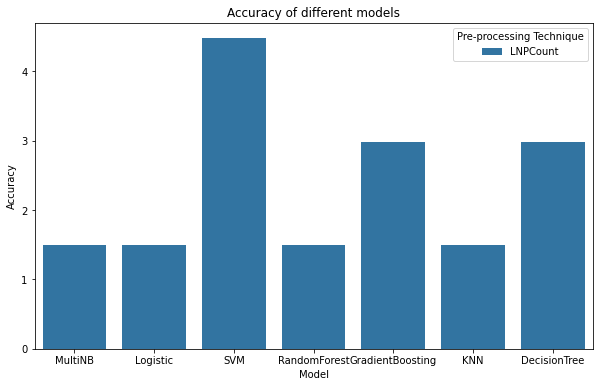

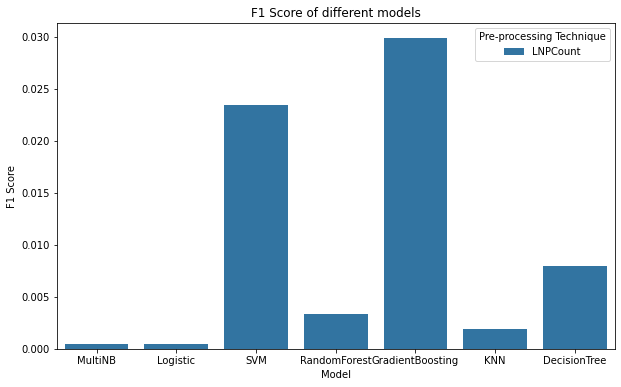

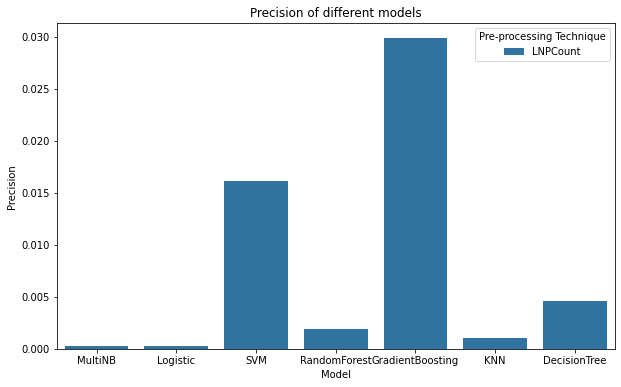

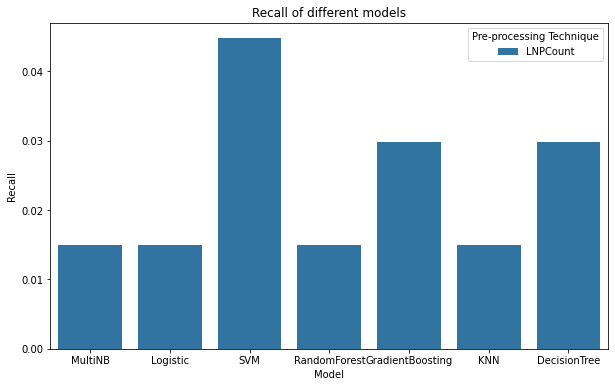

In [25]:
#import counter
from collections import Counter
# Store evaluation metrics in a dataframe
eval_metrics = pd.DataFrame(columns=['Pre-processing Technique', 'Model', 'Max Features', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Create a list of models and DL Models
models = [MultiNB, Logistic, SVM, RandomForest, GradientBoosting, KNN, DecisionTree, NeuralNetwork, LSTM, GRU, BiLSTM, RNN_BiLSTM, CNN]

DL_models = [NeuralNetwork, LSTM, GRU, BiLSTM, RNN_BiLSTM, CNN]

# Create feature set using frequency of top 100 letters, nuumbers, punctuations
X = df['Content'].apply(lambda x: pd.Series(Counter(x)))
X = X.fillna(0)

y = df['AuthorID']

X_test = df_test['Content'].apply(lambda x: pd.Series(Counter(x)))
X_test.fillna(0, inplace=True)

y_test = df_test['AuthorID']

#remove columns that are not in X or X_test
X = X[X.columns.intersection(X_test.columns)]
X_test = X_test[X_test.columns.intersection(X.columns)]
print(X.shape)
print(X_test.shape)

for model in models[:-6]:
        # if model in DL_models:
        #     X = X.to_numpy() 
        #     X_test = X_test.to_numpy()
        acc, f1, prec, rec = model(X, y, X_test, y_test)
        eval_metrics = eval_metrics.append({'Pre-processing Technique': 'LNPCount', 'Model': model.__name__, 'Max Features': X.shape, 'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec}, ignore_index=True)

#plot the evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns

#plot accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Pre-processing Technique', data=eval_metrics)
plt.title('Accuracy of different models')
plt.savefig('Accuracy.png')

#plot f1 score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', hue='Pre-processing Technique', data=eval_metrics)
plt.title('F1 Score of different models')
plt.savefig('F1 Score.png')

#plot precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', hue='Pre-processing Technique', data=eval_metrics)
plt.title('Precision of different models')
plt.savefig('Precision.png')

#plot recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', hue='Pre-processing Technique', data=eval_metrics)
plt.title('Recall of different models')
plt.savefig('Recall.png')

#print model and max features with best evaluation metrics
print(eval_metrics.loc[eval_metrics['Accuracy'].idxmax()])
print(eval_metrics.loc[eval_metrics['F1 Score'].idxmax()])
print(eval_metrics.loc[eval_metrics['Precision'].idxmax()])
print(eval_metrics.loc[eval_metrics['Recall'].idxmax()])


## Character n-grams

In [24]:
for features in range(500,10000, 500):
    # create the feature set using 1000 most frequently ranked character n-grams
    c_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2,3), max_features=features)
    # fit the vectorizer to the training data
    c_vectorizer.fit(df['Content'])
    # transform the training data
    X_test = c_vectorizer.transform(df['Content'])

    # create the label set
    y_test = df['AuthorID']

    X = c_vectorizer.transform(df_test['Content'])
    y = df_test['AuthorID']

    for model in models[:-6]:
        if model in DL_models:
            X = X.toarray() 
            X_test = X_test.toarray()
        acc, f1, prec, rec = model(X, y, X_test, y_test)
        eval_metrics = eval_metrics.append({'Pre-processing Technique': 'Character n-grams', 'Model': model.__name__, 'Max Features': features, 'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec}, ignore_index=True)

#plot the evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns

eval_metrics.to_csv('eval_metrics_char_gram.csv')

#plot the accuracy
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Accuracy', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Character n-grams'])
plt.title('Accuracy of Models using Character n-grams')
plt.savefig('Accuracy of Models using Character n-grams.png')

#plot the f1 score
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='F1 Score', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Character n-grams'])
plt.title('F1 Score of Models using Character n-grams')
plt.savefig('F1 Score of Models using Character n-grams.png')

#plot the precision
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Precision', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Character n-grams'])
plt.title('Precision of Models using Character n-grams')
plt.savefig('Precision of Models using Character n-grams.png')

#plot the recall
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Recall', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Character n-grams']) 
plt.title('Recall of Models using Character n-grams')
plt.savefig('Recall of Models using Character n-grams.png')


#print model and max features with best evaluation metrics
print(eval_metrics.loc[eval_metrics['Accuracy'].idxmax()])
print(eval_metrics.loc[eval_metrics['F1 Score'].idxmax()])
print(eval_metrics.loc[eval_metrics['Precision'].idxmax()])
print(eval_metrics.loc[eval_metrics['Recall'].idxmax()])



KeyboardInterrupt: 

## Word n-grams

In [ ]:
#word n-grams
for features in range(500,5000, 250):
    # create the feature set using 1000 most frequently ranked character n-grams
    w_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features=features)
    # fit the vectorizer to the training data
    w_vectorizer.fit(df['Content'])
    # transform the training data
    X_test = w_vectorizer.transform(df['Content'])

    # create the label set
    y_test = df['AuthorID']

    X = w_vectorizer.transform(df_test['Content'])
    y = df_test['AuthorID']

    for model in models[:-6]:
        if model in DL_models:
            X = X.toarray() 
            X_test = X_test.toarray()
        acc, f1, prec, rec = model(X, y, X_test, y_test)
        eval_metrics = eval_metrics.append({'Pre-processing Technique': 'Word n-grams', 'Model': model.__name__, 'Max Features': features, 'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec}, ignore_index=True)

#plot the evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns

eval_metrics.to_csv('eval_metrics_word_gram.csv')

#plot the accuracy
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Accuracy', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Word n-grams'])
plt.title('Accuracy of Models using Word n-grams')
plt.savefig('Accuracy of Models using Word n-grams.png')

#plot the f1 score
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='F1 Score', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Word n-grams'])
plt.title('F1 Score of Models using Word n-grams')
plt.savefig('F1 Score of Models using Word n-grams.png')

#plot the precision
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Precision', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Word n-grams'])
plt.title('Precision of Models using Word n-grams')
plt.savefig('Precision of Models using Word n-grams.png')

#plot the recall
plt.figure(figsize=(20,10))
sns.lineplot(x='Max Features', y='Recall', hue='Model', data=eval_metrics[eval_metrics['Pre-processing Technique'] == 'Word n-grams'])
plt.title('Recall of Models using Word n-grams')
plt.savefig('Recall of Models using Word n-grams.png')

#print model and max features with best evaluation metrics
print(eval_metrics.loc[eval_metrics['Accuracy'].idxmax()])
print(eval_metrics.loc[eval_metrics['F1 Score'].idxmax()])
print(eval_metrics.loc[eval_metrics['Precision'].idxmax()])
print(eval_metrics.loc[eval_metrics['Recall'].idxmax()])